In [ ]:
pip install numpy tensorflow hmmlearn scikit-learn pandas matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.6/164.6 kB 3.9 MB/s eta 0:00:00


In [ ]:
from google.colab import files
import pandas as pd

def load_dataset():
    """
    Loads the protein sequence dataset by allowing the user to upload a CSV file.

    Returns:
    pd.DataFrame: DataFrame containing the sequences and labels
    """
    # Prompt user to upload the file
    uploaded = files.upload()

    # Get the file name from the uploaded file
    file_name = list(uploaded.keys())[0]

    # Load dataset into pandas dataframe
    df = pd.read_csv(file_name)

    return df

# Example usage
dataset = load_dataset()
dataset.head()  # Display the first few rows of the dataset

Saving CB513.csv to CB513.csv


,input,dssp3,dssp8,disorder,cb513_mask
0,RTDCYGNVNRIDTTGASCKTAKPEGLSYCGVSASKKIAERDLQAMD...,CCCCCCCHHHCCCCCECHHHHCCCCCCCCEHHHHHHHHHHCHHHHH...,CCCTTCCGGGSCCCCBCHHHHTTTTCSCCBHHHHHHHHHHTHHHHH...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
1,GKITFYEDRGFQGRHYECSSDHSNLQPYFSRCNSIRVDSGCWMLYE...,CEEEEEEECCCEEEEEEECCCECCCCCCCCCCCEEEEEECEEEEEC...,CEEEEEEETTTEEEEEEECSCBSCCTTTCSCCSEEEEEESEEEEES...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
2,MFKVYGYDSNIHKCVYCDNAKRLLTVKKQPFEFINIMPEKGVFDDE...,CEEEEECCCCCCCCHHHHHHHHHHHHCCCCEEEEECCCECCECCHH...,CEEEEECCTTTSCCHHHHHHHHHHHHTTCCEEEEESCSBTTBCCHH...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
3,APAFSVSPASGASDGQSVSVSVAAAGETYYIAQCAPVGGQDACNPA...,CCEEEEECCCCCCCCCEEEEEEECCCCEEEEEEECEECCEECCCCC...,CCEEEEECCSSCCSSCEEEEEEESCCSEEEEEEECEETTEECCCTT...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....
4,TPAFNKPKVELHVHLDGAIKPETILYFGKKRGIALPADTVEELRNI...,CCCCCCCEEEEEEEHHHCCCHHHHHHHHHHHCCCCCCCCHHHHHHH...,CCSCCSCEEEEEEEGGGSCCHHHHHHHHHHHTCCCSCSSHHHHHHH...,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....,1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1....


In [ ]:
import numpy as np
def encode_sequence(sequence):
    """
    Encodes a protein sequence into a numerical format using a predefined mapping
    for the 20 standard amino acids.

    Parameters:
    sequence (str): A string representing the protein sequence (e.g., 'ACDEFGHIKLMNPQRSTVWY')

    Returns:
    np.array: Numerical representation of the sequence
    """
    # Define the amino acid encoding dictionary
    amino_acid_map = {
        'A': 0, 'C': 1, 'D': 2, 'E': 3, 'F': 4, 'G': 5, 'H': 6, 'I': 7,
        'K': 8, 'L': 9, 'M': 10, 'N': 11, 'P': 12, 'Q': 13, 'R': 14, 'S': 15,
        'T': 16, 'V': 17, 'W': 18, 'Y': 19
    }

    # Convert the sequence to a list of encoded values
    encoded_sequence = [amino_acid_map[aa] for aa in sequence if aa in amino_acid_map]

    return np.array(encoded_sequence)

# Example usage
sequence = "ACDEFGHIKLMNPQRSTVWY"
encoded_sequence = encode_sequence(sequence)
print(encoded_sequence)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]


In [ ]:
# Function to encode the 'input' column and replace it in the DataFrame
def encode_and_replace_input(df):
    """
    Encodes the 'input' column (protein sequences) into numerical format
    and replaces the original 'input' column with the encoded values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the dataset

    Returns:
    pd.DataFrame: The modified DataFrame with the 'input' column replaced
    """
    # Apply the encoding function and replace the 'input' column
    df['input'] = df['input'].apply(encode_sequence)

    return df

# Apply encoding and replacement to the dataset
encoded_dataset = encode_and_replace_input(dataset)

In [ ]:
# Define the label encoding function for 'dssp3'
def encode_and_replace_labels(df):
    """
    Encodes the 'dssp3' column (secondary structure labels) into numerical format
    and replaces the original 'dssp3' column with the encoded values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the dataset

    Returns:
    pd.DataFrame: The modified DataFrame with the 'dssp3' column replaced
    """
    # Define the mapping for secondary structure labels
    label_map = {'H': 0, 'E': 1, 'C': 2}

    # Apply the label encoding and replace the 'dssp3' column
    df['dssp3'] = df['dssp3'].apply(lambda label_seq: [label_map[label] for label in label_seq])

    return df

# Apply label encoding and replacement to the dataset
encoded_dataset = encode_and_replace_labels(encoded_dataset)

In [ ]:
# Define the label encoding function for 'dssp' (DSSP8)
def encode_and_replace_dssp8(df):
    """
    Encodes the 'dssp' column (DSSP8 secondary structure labels) into numerical format
    and replaces the original 'dssp' column with the encoded values.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the dataset

    Returns:
    pd.DataFrame: The modified DataFrame with the 'dssp' column replaced
    """
    # Define the DSSP8 mapping
    dssp8_map = {'H': 0, 'B': 1, 'E': 2, 'G': 3, 'I': 4, 'T': 5, 'S': 6, 'C': 7}

    # Apply the label encoding and replace the 'dssp' column
    df['dssp8'] = df['dssp8'].apply(lambda label_seq: [dssp8_map[label] for label in label_seq])

    return df

# Apply DSSP8 encoding and replacement to the dataset
encoded_dataset = encode_and_replace_dssp8(encoded_dataset)

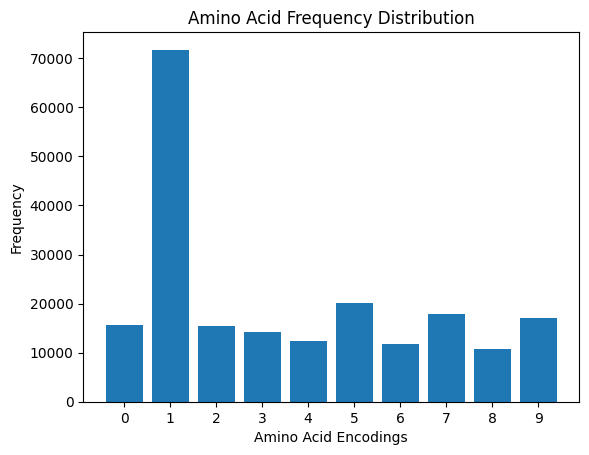

In [ ]:
import matplotlib.pyplot as plt

# Analyze the distribution of amino acids in the 'input' sequences
def amino_acid_distribution(df):
    all_sequences = ''.join(df['input'].apply(lambda x: ''.join(map(str, x))))  # Concatenate all sequences
    unique, counts = np.unique(list(all_sequences), return_counts=True)

    plt.bar(unique, counts)
    plt.xlabel('Amino Acid Encodings')
    plt.ylabel('Frequency')
    plt.title('Amino Acid Frequency Distribution')
    plt.show()

# Call the function
amino_acid_distribution(encoded_dataset)

In [ ]:
# Function to apply sliding window
def apply_sliding_window(df, window_size=7):
    """
    Applies a sliding window to the input sequences to create overlapping subsequences.

    Parameters:
    df (pd.DataFrame): The DataFrame containing the dataset
    window_size (int): The size of the sliding window (default is 7)

    Returns:
    pd.DataFrame: DataFrame with sliding window applied, expanding the dataset
    """
    augmented_data = []

    for _, row in df.iterrows():
        sequence, label_seq = row['input'], row['dssp3']  # Use dssp or dssp3 depending on the task
        for i in range(len(sequence) - window_size + 1):
            window_seq = sequence[i:i + window_size]
            window_label = label_seq[i + window_size // 2]  # Center label as target

            augmented_data.append({'input_window': window_seq, 'label': window_label})

    return pd.DataFrame(augmented_data)

# Apply sliding window augmentation
window_size = 7  # Common choice for secondary structure prediction
augmented_dataset = apply_sliding_window(encoded_dataset, window_size)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, TimeDistributed
from tensorflow.keras.optimizers import Adam

In [ ]:
def build_bilstm_model(input_length, vocab_size, output_size):
    """
    Builds a Bidirectional LSTM model for sequence classification.

    Parameters:
    input_length (int): Length of the input sequences
    vocab_size (int): Number of unique tokens (amino acids)
    output_size (int): Number of output classes (secondary structure states)

    Returns:
    model (Sequential): Compiled BiLSTM model
    """
    model = Sequential([
        # Embedding layer: Converts input indices into dense vectors of fixed size
        Embedding(input_dim=vocab_size, output_dim=64, input_length=input_length),

        # Bidirectional LSTM layer: Captures both forward and backward dependencies
        Bidirectional(LSTM(64, return_sequences=True)),
        Dropout(0.3),

        # TimeDistributed Dense layer: Applies a Dense layer to each timestep
        TimeDistributed(Dense(output_size, activation='softmax'))
    ])

    # Compile the model
    model.compile(
        loss='categorical_crossentropy',  # Appropriate for multi-class classification
        optimizer=Adam(learning_rate=0.001),
        metrics=['accuracy']
    )

    return model

# Define parameters
input_length = 7  # Window size (adjust based on your sliding window size)
vocab_size = 20   # Number of amino acids
output_size = 3   # Number of secondary structure classes (H, E, C)

# Build the model
bilstm_model = build_bilstm_model(input_length, vocab_size, output_size)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Function to prepare data
def prepare_data(df, window_size, num_classes):
    """
    Prepares sequences and labels for training the BiLSTM model.

    Parameters:
    df (pd.DataFrame): The DataFrame containing 'input_window' and 'label'
    window_size (int): Length of each input sequence window
    num_classes (int): Number of label classes

    Returns:
    X, y: Prepared input and output data
    """
    X = np.stack(df['input_window'].values)  # Stack sequences into array
    y = to_categorical(df['label'].values, num_classes=num_classes)  # One-hot encode labels

    return X, y

# Prepare data
X, y = prepare_data(augmented_dataset, window_size, output_size)

# Split into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Reshape input data to (samples, time_steps, features)
# Assuming each sequence is of length n and has features of size 1
X_train = np.array(X_train)
X_val = np.array(X_val)

# Reshaping the data if it's not already in 3D format (e.g., (batch_size, time_steps, features))
X_train = X_train.reshape((X_train.shape[0], X_train.shape[1], 1))
X_val = X_val.reshape((X_val.shape[0], X_val.shape[1], 1))

# Verify the shape
print(X_train.shape, X_val.shape)

(112676, 7, 1) (28170, 7, 1)


In [ ]:
# If your labels are one-hot encoded, convert them to integers
y_train = np.argmax(y_train, axis=-1)  # Convert one-hot encoding to integer labels
y_val = np.argmax(y_val, axis=-1)  # Convert one-hot encoding to integer labels

# Check the shape of the labels
print(f"y_train shape: {y_train.shape}, y_val shape: {y_val.shape}")

y_train shape: (112676,), y_val shape: (28170,)


In [ ]:
from sklearn.preprocessing import StandardScaler
import numpy as np

# Initialize the scaler
scaler = StandardScaler()

# Flatten the data
X_train_reshaped = X_train.reshape(-1, X_train.shape[2])
X_val_reshaped = X_val.reshape(-1, X_val.shape[2])

# Fit and transform the training data
X_train_scaled = scaler.fit_transform(X_train_reshaped)
X_val_scaled = scaler.transform(X_val_reshaped)

# Reshape back to the original shape
X_train_normalized = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_val_normalized = X_val_scaled.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2])

In [ ]:
from keras.models import Sequential
from keras.layers import Bidirectional, LSTM, Dropout, Dense
from keras.optimizers import Adam

# Model architecture
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(256, return_sequences=True), input_shape=(X_train.shape[1], X_train.shape[2])))
bilstm_model.add(Dropout(0.5))  # Add dropout for regularization
bilstm_model.add(LSTM(64))  # Decrease units if the model is too complex
bilstm_model.add(Dropout(0.5))  # Dropout again before dense layer
bilstm_model.add(Dense(3, activation='softmax'))  # Output layer with softmax for multi-class classification

# Compile the model
bilstm_model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

from keras.callbacks import ReduceLROnPlateau

lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.0001)

bilstm_model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ bidirectional_1 (Bidirectional)      │ (None, 7, 512)              │         528,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 7, 512)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_2 (LSTM)                        │ (None, 64)                  │         147,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 676,291 (2.58 MB)

 Trainable params: 676,291 (2.58 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model with more epochs
history = bilstm_model.fit(
    X_train_normalized, y_train,
    epochs=30,  # Increase the number of epochs
    batch_size=32,
    validation_data=(X_val_normalized, y_val),
    verbose=2,
    callbacks=[lr_scheduler]  # Add learning rate scheduler
)

Epoch 1/30
3522/3522 - 30s - 9ms/step - accuracy: 0.4380 - loss: 1.0518 - val_accuracy: 0.4405 - val_loss: 1.0472 - learning_rate: 0.0010
Epoch 2/30
3522/3522 - 38s - 11ms/step - accuracy: 0.4488 - loss: 1.0451 - val_accuracy: 0.4604 - val_loss: 1.0365 - learning_rate: 0.0010
Epoch 3/30
3522/3522 - 41s - 12ms/step - accuracy: 0.4576 - loss: 1.0335 - val_accuracy: 0.4648 - val_loss: 1.0212 - learning_rate: 0.0010
Epoch 4/30
3522/3522 - 41s - 12ms/step - accuracy: 0.4732 - loss: 1.0206 - val_accuracy: 0.4844 - val_loss: 1.0076 - learning_rate: 0.0010
Epoch 5/30
3522/3522 - 25s - 7ms/step - accuracy: 0.5003 - loss: 1.0010 - val_accuracy: 0.5142 - val_loss: 0.9854 - learning_rate: 0.0010
Epoch 6/30
3522/3522 - 41s - 12ms/step - accuracy: 0.5216 - loss: 0.9807 - val_accuracy: 0.5318 - val_loss: 0.9655 - learning_rate: 0.0010
Epoch 7/30
3522/3522 - 40s - 11ms/step - accuracy: 0.5386 - loss: 0.9629 - val_accuracy: 0.5453 - val_loss: 0.9547 - learning_rate: 0.0010
Epoch 8/30
3522/3522 - 41s - 

In [ ]:
# Function to evaluate the model
def evaluate_model(model, X_val, y_val):
    """
    Evaluates the trained model on the validation data.

    Parameters:
    model (Sequential): The trained model
    X_val (np.array): Validation input sequences
    y_val (np.array): Validation labels

    Returns:
    loss (float): Loss value on the validation data
    accuracy (float): Accuracy on the validation data
    """
    loss, accuracy = model.evaluate(X_val, y_val, verbose=1)
    print(f'Validation Loss: {loss}')
    print(f'Validation Accuracy: {accuracy}')

# Evaluate the model
evaluate_model(bilstm_model, X_val_normalized, y_val)

881/881 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.6780 - loss: 0.7999
Validation Loss: 0.8092733025550842
Validation Accuracy: 0.676606297492981


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Predict classes for the test set
y_pred = np.argmax(bilstm_model.predict(X_val_normalized), axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_val, y_pred)

print("Confusion Matrix:")
print(cm)

# Classification report for precision, recall, F1-score
print("Classification Report:")
print(classification_report(y_val, y_pred))


881/881 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step
Confusion Matrix:
[[6638  977 2179]
 [1154 3456 1694]
 [1889 1217 8966]]
Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.68      0.68      9794
           1       0.61      0.55      0.58      6304
           2       0.70      0.74      0.72     12072

    accuracy                           0.68     28170
   macro avg       0.67      0.66      0.66     28170
weighted avg       0.67      0.68      0.67     28170



In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_val, y_pred)
precision = precision_score(y_val, y_pred, average='weighted')
recall = recall_score(y_val, y_pred, average='weighted')
f1 = f1_score(y_val, y_pred, average='weighted')

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.6766063187788427
Precision: 0.6745435978089633
Recall: 0.6766063187788427
F1 Score: 0.6748857962421669


In [ ]:
print(history.history.keys())

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss', 'learning_rate'])


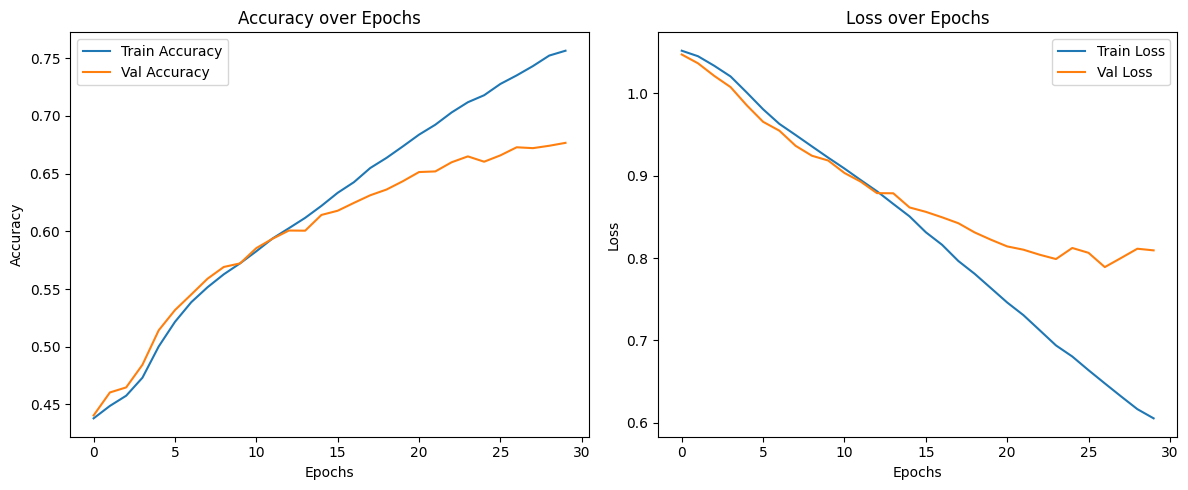

In [ ]:
import matplotlib.pyplot as plt

# Function to plot training history
def plot_training_history(history):
    """
    Plots training and validation loss and accuracy curves.

    Parameters:
    history (History): History object containing training details
    """
    # Plot accuracy
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss over Epochs')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(history)